# **Algoritmos e Estruturas de Dados - Problema da mochila**

# **Apresentação do problema** 

O problema da mochila, também conhecido como *knapsack problem*, foi proposto por Tobias Dantzig (1884 - 1956) [1] sendo estudado desde 1897. Ele é um problema de otimização combinatória, ou seja, busca achar um melhor conjunto a partir de uma base de dados. O problema constitui basicamente de uma mochila com capacidade máxima **W** que permite guardar **n** objetos com pesos e valores individuais. A soma dos pesos dos objetos dentro da mochila não pode ultrapassar a capacidade máxima **W**.

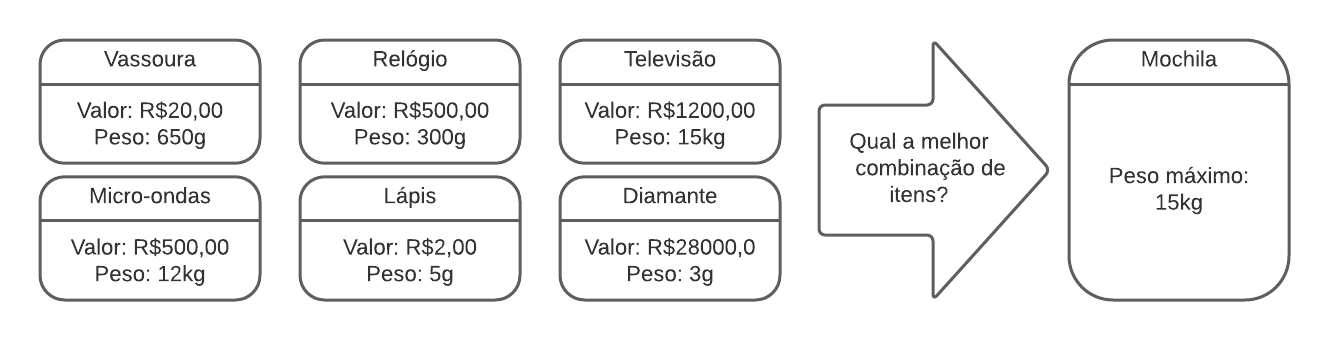

Formalmente, ele pode ser descrito da seguinte forma: 

*Sendo W a capacidade máxima da mochila, x_i cada objeto, v_i e w_i o valor e peso do respectivo objeto.*

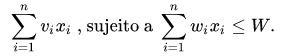

# **Análise de complexidade do problema**

O problema da mochila é um NP-completo fraco, pseudo polinomial, isso quer dizer que não há um definição matemática que possa analisar seu tempo de resolução. Conseguimos determinar seu tempo através testes e não tem um algoritmo correto e rápido para todos os casos de testes. 

Quando não é chamado de NP-completo fraco, o problema da mochila é referenciado como "o NP-difícil mais fácil" [2], pois embora saiba-se o caminho para resolvê-lo, para certos inputs ainda não é possível determinar o resultado exato.

# **Algumas estratégias para tratar o problema**

* Força bruta
* Método guloso 
* Recursão 
* Programação dinâmica 
* Algoritmo genético
* Entre outros...

# **Exemplos de aplicações reais usando o problema da mochila**

* Mercado financeiro
* Organização de horários
* Organização de transporte de mercadorias
* Investimento de capital
* Orçamento
* Criptografia de chave pública

# **Implementação**

In [ ]:
#@title **Bibliotecas e importes**
#@markdown Apenas execute essa célula.
import matplotlib.pyplot as plt
from random import randint
from random import random
import random as rd
import pandas as pd
import numpy as np
import matplotlib
import math
import time

In [ ]:
#@title **Valores de input**

quantidade_de_itens =  20#@param {type:"number"} 
item_number = quantidade_de_itens
limite_de_peso =  48#@param {type:"number"}
knapsack_threshold = limite_de_peso 

In [ ]:
#@title **Banco de dados**
weightList = []
valueList = []
def build_items(item_number):
  from random import random
  res = []
  for i in range(item_number):
    w = 1+int(15*random())
    weightList.append(w)
    v = 1+int(20*random())
    valueList.append(v)
    res.append((i, w, v))
  return res
items = build_items(item_number)
# items: [(id, weight, value)]

def weight(item):
	return item[1]

def value(item):
	return item[2]

def density(item):
	return float(value(item))/weight(item)

pd.DataFrame(items,columns=["Item","Peso","Valor"])
#print('Item      Peso      Valor')
#for i in range(len(items)):
#    print('{0}          {1}         {2}\n'.format(items[i][0], items[i][1], items[i][2]))

,Item,Peso,Valor
0,0,12,19
1,1,3,13
2,2,12,4
3,3,10,18
4,4,6,9
5,5,4,3
6,6,1,2
7,7,3,1
8,8,14,16
9,9,15,3


In [ ]:
# ---------------------------------------------------------------------- #

#@title **Método da força bruta**
#@markdown **Complexidade:** 

#@markdown  O((2^n)*n)

#@markdown **Comportamento:** 

#@markdown Percorre todos os subconjuntos possíveis que existem dentro da lista de itens. 

#@markdown Por exemplo, caso existam dois itens, o conjunto potência dele é:

#@markdown [[ ], [SOMENTE PRIMEIRO], [SOMENTE SEGUNDO], [PRIMEIRO E SEGUNDO]]

#@markdown Para três objetos, teríamos:
 
#@markdown [[ ], [SOMENTE PRIMEIRO], [SOMENTE SEGUNDO], [PRIMEIRO E SEGUNDO], [TERCEIRO], [PRIMEIRO E TERCEIRO], [SEGUNDO E TERCEIRO], [PRIMEIRO, SEGUNDO E TERCEIRO]] 

#@markdown Por último, faz análise de qual conjunto apresenta o melhor resultado (maior número de itens e maior valor acumulado).

#@markdown Por isso a complexidade é O((2^n)*n), 2^n se refere ao conjunto potência, e a multiplicação por n se refere ao loop para realizar a soma de cada subconjunto.

# ---------------------------------------------------------------------- #


def powerset(items): # CONJUNTO POTENCIA COM TODAS AS COMBINAÇÕES POSSÍVEIS 
  res = [[]]
  for item in items:
    newset = [r+[item] for r in res]
    res.extend(newset)
  return res

def knapsack_brute_force(items, max_weight):
  knapsack = []
  best_weight = 0
  best_value = 0
  for item_set in powerset(items):
    set_value = sum(map(value, item_set))
    set_weight = sum(map(weight, item_set))
    if set_value > best_value and set_weight <= max_weight:
      best_weight = set_weight
      best_value = set_value
      knapsack = item_set
  return knapsack, best_weight, best_value

print()
start = time.time()
knapsack_real, opt_wt, opt_val = knapsack_brute_force(items, knapsack_threshold)
end = time.time()
print("QUANTIDADE DE ITENS: ",item_number,"\nPESO MÁXIMO: ",knapsack_threshold,"\n")
print("CONJUNTO DE ITEMS [id, peso, valor]:\n",items)
print("\nCONJUNTO SOLUÇÃO:\n",knapsack_real, "\nPESO DA MOCHILA: ",opt_wt,"\nVALOR DA MOCHILA: ", opt_val)
print("Tempo: {:.4}".format(end-start))


QUANTIDADE DE ITENS:  20 
PESO MÁXIMO:  48 

CONJUNTO DE ITEMS [id, peso, valor]:
 [(0, 12, 19), (1, 3, 13), (2, 12, 4), (3, 10, 18), (4, 6, 9), (5, 4, 3), (6, 1, 2), (7, 3, 1), (8, 14, 16), (9, 15, 3), (10, 13, 8), (11, 2, 9), (12, 8, 8), (13, 2, 4), (14, 13, 20), (15, 3, 20), (16, 9, 8), (17, 6, 13), (18, 3, 17), (19, 5, 18)]

CONJUNTO SOLUÇÃO:
 [(1, 3, 13), (3, 10, 18), (6, 1, 2), (11, 2, 9), (13, 2, 4), (14, 13, 20), (15, 3, 20), (17, 6, 13), (18, 3, 17), (19, 5, 18)] 
PESO DA MOCHILA:  48 
VALOR DA MOCHILA:  134
Tempo: 3.589


In [ ]:
# ---------------------------------------------------------------------- #

#@title **Programação dinâmica**
#@markdown **Complexidade:** 

#@markdown  O(n*W)

#@markdown **Comportamento:** 

#@markdown A ideia básica da programação dinâmica da mochila é usar uma tabela para armazenar as soluções dos subproblemas resolvidos. Se você enfrentar um subproblema novamente, basta pegar a solução da tabela sem ter que resolvê-lo. Portanto, essa abordagem é muito eficaz. 

#@markdown Por meio dessa abordagem, não é recomendável guardar os itens que foram adicionados à mochila. Afinal, pode existir equivalência, por exemplo: dois itens que somam o mesmo valor e peso de um único item. 

# ---------------------------------------------------------------------- #

def knapSack_dp(items, max_weight,item_number):
  dp = [0 for i in range(max_weight+1)] # CRIANDO O ARRAY 
  mochila = []
  for i in range(1, item_number+1): # TIRANDO OS PRIMEIROS i ELEMENTOS 
    for w in range(max_weight, 0, -1): # COMEÇA DE TRÁS PARA FRENTE PORQUE AÍ JÁ TÊM OS VALORES SALVOS
      if ((items[i-1])[1]) <= w:
				# VERIFICANDO SE É MELHOR TIRAR O ÚLTIMO ITEM DA MOCHILA OU DEIXÁ-LO 
        dp[w] = max(dp[w], dp[w-((items[i-1])[1])]+((items[i-1])[2]))
      
  return dp[-1] # RETORNO 


print()
print("QUANTIDADE DE ITENS: ",item_number,"\nPESO MÁXIMO: ",knapsack_threshold)
#print("CONJUNTO DE ITEMS [id, peso, valor]:\n",items)
print("\nCONJUNTO SOLUÇÃO FORÇA BRUTA:\n",knapsack_real, "\nPESO DA MOCHILA: ",opt_wt,"\nVALOR DA MOCHILA: ", opt_val)
print()
start = time.time()
print("PESO DA MOCHILA COM PROGRAMACAO DINAMICA\n",knapSack_dp(items,knapsack_threshold,item_number))
end = time.time()
print("Tempo {:.4}".format(end - start))




QUANTIDADE DE ITENS:  20 
PESO MÁXIMO:  48

CONJUNTO SOLUÇÃO FORÇA BRUTA:
 [(1, 3, 13), (3, 10, 18), (6, 1, 2), (11, 2, 9), (13, 2, 4), (14, 13, 20), (15, 3, 20), (17, 6, 13), (18, 3, 17), (19, 5, 18)] 
PESO DA MOCHILA:  48 
VALOR DA MOCHILA:  134

PESO DA MOCHILA COM PROGRAMACAO DINAMICA
 134
Tempo 0.0007646


In [ ]:
# ---------------------------------------------------------------------- #

#@title **Método guloso**
#@markdown **Complexidade:** O(nlogn)

#@markdown **Comportamento:** 

#@markdown Faz um sort e adiciona na mochila até chegar no limite de peso. 

#@markdown Depois do limite ser atingido, o algoritmo para. 

#@markdown A maneira como a ordenação é feita faz toda diferença. 

#@markdown Se for por peso, os mais leves vão sendo adicionados até que se chegue no limite. Por outro lado, às vezes um item bem pesado pode ter valor muito alto, de forma que compensaria ele ser adicionado, mas como ele está no fim da lista, esse método de ordenação não cobre essa possibilidade.

#@markdown Se for por valor, os mais valiosos vão sendo adicionados até que se chegue no limite. Esse é o método mais ineficaz dos três, pois temos itens pesados e valiosos, então a mochila enche rápido, embora contenha os itens com maior valor. 

#@markdown Se for por densidade (valor/peso), os itens com maior custo-benefício vão sendo adicionados até que se chegue no limite. Esse é o método mais eficaz.

# ---------------------------------------------------------------------- #

def knapsack_greedy(items, max_weight, keyFunc,peso):
  knapsack = []
  knapsack_weight = 0
  knapsack_value = 0
  if (peso==False):
    items_sorted = sorted(items, key=keyFunc)
  else:
    items_sorted = sorted(items,key=keyFunc,reverse=True)
  while len(items_sorted) > 0:
    item = items_sorted.pop()
    if weight(item) + knapsack_weight <= max_weight:
      knapsack.append(item)
      knapsack_weight += weight(knapsack[-1])
      knapsack_value += value(knapsack[-1])
    else:
      break
  return knapsack, knapsack_weight, knapsack_value

print()
print("QUANTIDADE DE ITENS: ",item_number,"\nPESO MÁXIMO: ",knapsack_threshold,"\n")
print("CONJUNTO DE ITEMS [id, peso, valor]:\n",items)
print("\nCONJUNTO SOLUÇÃO:\n",knapsack_real, "\nPESO DA MOCHILA: ",opt_wt,"\nVALOR DA MOCHILA: ", opt_val)
start = time.time()
knapsack, wt, val = knapsack_greedy(items, knapsack_threshold, weight,True) # ADICIONANDO CONFORME MAIOR PESO 
end = time.time()
print()
print("ORDENACAO POR MENOR PESO: ",knapsack,"\nPESO DA MOCHILA: ", wt,"\nVALOR DA MOCHILA: ", val)
print("Tempo: {:.4}".format(end-start))
start = time.time()
knapsack, wt, val = knapsack_greedy(items, knapsack_threshold, value,False) # ADICIONANDO CONFORME MAIOR VALOR 
end = time.time()
print()
print("ORDENAÇÃO POR VALOR: ",knapsack,"\nPESO DA MOCHILA: ",wt,"\nVALOR DA MOCHILA: ",val)
print("Tempo: {:.4}".format(end-start))
start = time.time()
knapsack, wt, val = knapsack_greedy(items, knapsack_threshold, density,False) # ADICIONANDO CONFORME DENSIDADE
end = time.time()
print()
print("ORDENAÇÃO POR DENSIDADE: ",knapsack,"\nPESO DA MOCHILA: ",wt,"\nVALOR DA MOCHILA: ",val)
print("Tempo: {:.4}".format(end-start))


QUANTIDADE DE ITENS:  20 
PESO MÁXIMO:  48 

CONJUNTO DE ITEMS [id, peso, valor]:
 [(0, 12, 19), (1, 3, 13), (2, 12, 4), (3, 10, 18), (4, 6, 9), (5, 4, 3), (6, 1, 2), (7, 3, 1), (8, 14, 16), (9, 15, 3), (10, 13, 8), (11, 2, 9), (12, 8, 8), (13, 2, 4), (14, 13, 20), (15, 3, 20), (16, 9, 8), (17, 6, 13), (18, 3, 17), (19, 5, 18)]

CONJUNTO SOLUÇÃO:
 [(1, 3, 13), (3, 10, 18), (6, 1, 2), (11, 2, 9), (13, 2, 4), (14, 13, 20), (15, 3, 20), (17, 6, 13), (18, 3, 17), (19, 5, 18)] 
PESO DA MOCHILA:  48 
VALOR DA MOCHILA:  134

ORDENACAO POR MENOR PESO:  [(6, 1, 2), (13, 2, 4), (11, 2, 9), (18, 3, 17), (15, 3, 20), (7, 3, 1), (1, 3, 13), (5, 4, 3), (19, 5, 18), (17, 6, 13), (4, 6, 9), (12, 8, 8)] 
PESO DA MOCHILA:  46 
VALOR DA MOCHILA:  117
Tempo: 7.272e-05

ORDENAÇÃO POR VALOR:  [(15, 3, 20), (14, 13, 20), (0, 12, 19), (19, 5, 18), (3, 10, 18), (18, 3, 17)] 
PESO DA MOCHILA:  46 
VALOR DA MOCHILA:  112
Tempo: 5.913e-05

ORDENAÇÃO POR DENSIDADE:  [(15, 3, 20), (18, 3, 17), (11, 2, 9), (1, 3, 1

In [ ]:
# ---------------------------------------------------------------------- #
#@title **Algoritmo genético**
#@markdown **Complexidade:** 

#@markdown  Dadas as escolhas usuais (mutação, cruzamento, seleção de roda de roleta), a complexidade de um Algoritmo Genético é O (g (nm + nm + n)) com *g* sendo o número de gerações, *n* o tamanho da população e *m* o tamanho dos indivíduos . Portanto, a complexidade é da ordem de O(gnm).

#@markdown **Comportamento:** 

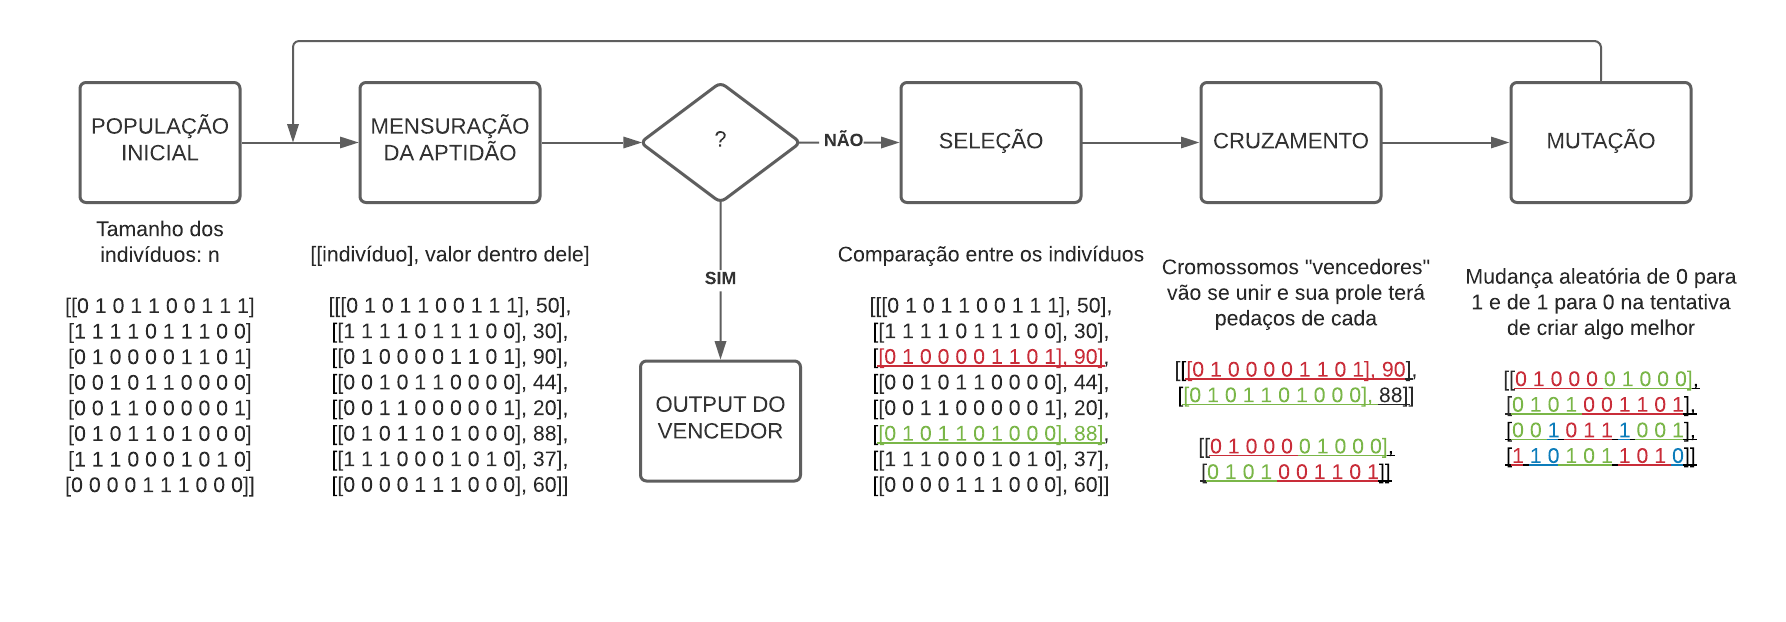

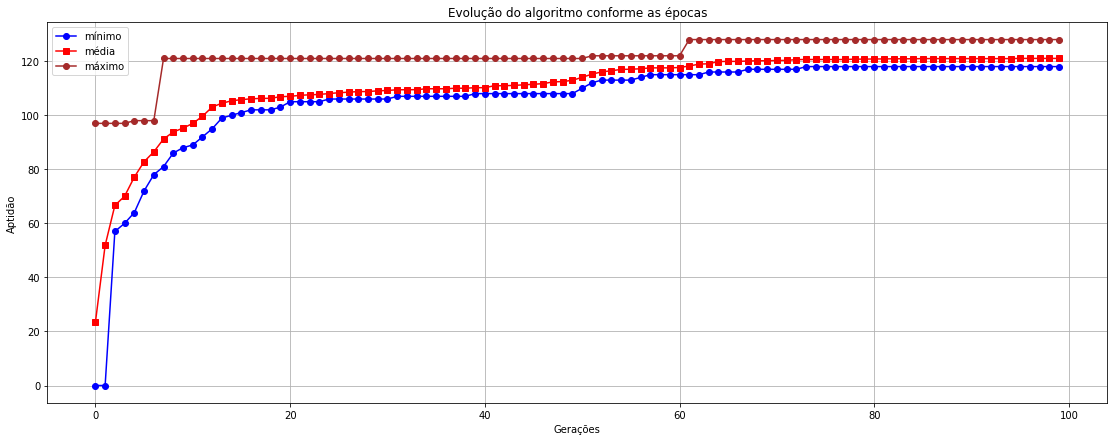


QUANTIDADE DE ITENS:  20 
PESO MÁXIMO:  48 

CONJUNTO DE ITEMS [id, peso, valor]:
 [(0, 12, 19), (1, 3, 13), (2, 12, 4), (3, 10, 18), (4, 6, 9), (5, 4, 3), (6, 1, 2), (7, 3, 1), (8, 14, 16), (9, 15, 3), (10, 13, 8), (11, 2, 9), (12, 8, 8), (13, 2, 4), (14, 13, 20), (15, 3, 20), (16, 9, 8), (17, 6, 13), (18, 3, 17), (19, 5, 18)]

CONJUNTO SOLUÇÃO REAL UTILIZANDO FORÇA BRUTA:
 [(1, 3, 13), (3, 10, 18), (6, 1, 2), (11, 2, 9), (13, 2, 4), (14, 13, 20), (15, 3, 20), (17, 6, 13), (18, 3, 17), (19, 5, 18)] 
PESO DA MOCHILA:  48 
VALOR DA MOCHILA:  134

CONJUNTO SOLUÇÃO DO ALGORITMO GENÉTICO:
 [(1, 3, 13), (3, 10, 18), (8, 14, 16), (11, 2, 9), (13, 2, 4), (15, 3, 20), (17, 6, 13), (18, 3, 17), (19, 5, 18)] 
PESO DA MOCHILA:  48 
VALOR DA MOCHILA:  128



In [ ]:
#@markdown **Análise:**
randCount = 0
randomList = []
randomList = [0.15,0.92,0.74,0.86,0.01,0.55,0.07,0.32,0.18,0.12,0.61,0.57,0.26,0.35,0.69,0.01,0.46,0.68,0.14,0.8,0.61,0.26,0.49,0.38,0.04,0.07,0.56,0.24,0.72]
populationSize = 30                    # TAMANHO DA POPULAÇÃO 
k = 4 	               
m = 0.04	                             # PROBABILIDADE DE MUTAÇÃO
iteration = 100	                       # NÚMEROS DE GERAÇÕES
bagSize = knapsack_threshold	         # CAPACIDADE MÁXIMA DA MOCHILA

# CRIANDO A POPULACAO INICIAL
def populacaoinicial():  
	individuo = ""
	individuoList = []
	global randCount
	for x in range(populationSize):
		for z in range(len(weightList)):
			if(randCount == len(randomList)):
				randCount=0
			if(float(randomList[randCount%len(randomList)]) < 0.5):
				individuo += "0"
			else:
				individuo += "1"

			randCount+=1		
		individuoList.append(individuo)
		individuo = ""
	return individuoList	

# CRIANDO LISTA COM OS VALORES DE APTIDÃO DE CADA INDIVÍDUO 
def evaluate(pList):
	sumWeight=0
	sumValue=0
	fitnessList = []
	for i in range(len(pList)):
		for j in range(len(pList[i])):
			if(pList[i][j] == "1"):
				sumWeight += int(weightList[j])
				sumValue += int(valueList[j])
		if(sumWeight <= bagSize):
			fitnessList.append((pList[i],sumValue))
		else:
			fitnessList.append((pList[i],0))
		sumWeight=0
		sumValue=0
	return fitnessList

### USANDO O VALOR DE K PARA REALIZAR A ESCOLHA DOS ANTECESSORES
def parentSelect(fList):
	tempList = []
	parentSelectList = []
	global randCount
	for i in range(len(fList)):
		for j in range(int(k)):
			if(randCount == len(randomList)):
				randCount=0
			index = math.ceil(float(randomList[randCount%len(randomList)])*len(fList))-1
			tempList.append(fList[index])
			randCount+=1
		tempList.sort()
		parentSelectList.append(tempList[0])
		tempList = []
	return parentSelectList

# CRIANDO O FILHO A PARTIR DOS DOIS MELHORES "PARENTES"
def recombine(pList):
	childList = []
	global randCount
	for i in range(int(len(pList)/2)):
		if(randCount == len(randomList)):
			randCount=0
		index = math.ceil(float(randomList[randCount%len(randomList)])*len(weightList))-1
		randCount+=1	
		c1=pList[i][0][:index]+pList[i+1][0][index:]
		c2=pList[i+1][0][:index]+pList[i][0][index:]
		childList.append(c1)
		childList.append(c2)
	return childList

# APLICAÇÃO DA MUTAÇÃO (CRIA UMA LISTA COM ELAS)
def mutation(childList):
	mutationList = []
	global randCount
	for i in range(len(childList)):
		for j in range(len(weightList)):
			if(randCount == len(randomList)):
				randCount=0
			if(float(randomList[randCount%len(randomList)]) < m):
				if(childList[i][j]=="0"):
					temp = list(childList[i])
					temp[j] = "1"
					childList[i] = "".join(temp)
				else:
					temp = list(childList[i])
					temp[j] = "0"
					childList[i] = "".join(temp)	
			randCount+=1					
		mutationList.append(childList[i])				
	
	return mutationList	

# ESCOLHA DOS SOBREVIVENTES ENTRE A LISTA DOS MAIS APTOS E A LISTA DOS MUTANTES
def survivorSelect(cList, pList):
	childEva = evaluate(cList)
	eva = list(childEva + pList)
	eva.sort(key=lambda srt: srt[1],reverse=True)

	return eva[:len(pList)]	

# PRINCIPAL 
if __name__=='__main__':
    i = 0
    minList = []
    maxList = []
    avg = 0
    avgList = []
    itList = range(iteration)
    populationList=populacaoinicial()
    fitnessList=evaluate(populationList)

    while (i < iteration):
      avg = 0
      parentSelectedList = parentSelect(fitnessList)
      childList = recombine(parentSelectedList)	
      mutationList = mutation(childList)
      survivorList = survivorSelect(mutationList,fitnessList)

      for j in range(len(survivorList)):
        avg += int(survivorList[j][1])

      avgList.append(avg/len(survivorList))
      minList.append(min(survivorList,key=lambda srt: srt[1])[1])
      maxList.append(max(survivorList,key=lambda srt: srt[1])[1])
      fitnessList = survivorList
      i += 1

  
    plt.figure(figsize=(19,7))
    plt.plot(itList,minList,'o-',c='blue')
    plt.plot(itList,avgList,'s-',c='red')
    plt.plot(itList,maxList,'o-',c='brown')
    plt.grid(True)		
    plt.xlabel('Gerações')
    plt.ylabel('Aptidão')
    plt.legend(["mínimo","média","máximo"])
    plt.title("Evolução do algoritmo conforme as épocas")
    plt.show()
 

#ga_knapsack()

vencedores = ""
vencedores += survivorList[0][0]
mochila_itens = []
for i in range(len(vencedores)):
    if(vencedores[i]=="1"):
        mochila_itens.append(items[i])

ga_value = 0
ga_weight = 0
for j in range(len(mochila_itens)):
  ga_value+=mochila_itens[j][2]
  ga_weight+=mochila_itens[j][1]

print()
print("QUANTIDADE DE ITENS: ",item_number,"\nPESO MÁXIMO: ",knapsack_threshold,"\n")
print("CONJUNTO DE ITEMS [id, peso, valor]:\n",items)
print("\nCONJUNTO SOLUÇÃO REAL UTILIZANDO FORÇA BRUTA:\n",knapsack_real, "\nPESO DA MOCHILA: ",opt_wt,"\nVALOR DA MOCHILA: ", opt_val)
print()
print("CONJUNTO SOLUÇÃO DO ALGORITMO GENÉTICO:\n",mochila_itens,"\nPESO DA MOCHILA: ", ga_weight,"\nVALOR DA MOCHILA: ", ga_value)
print()

# **Conclusão**

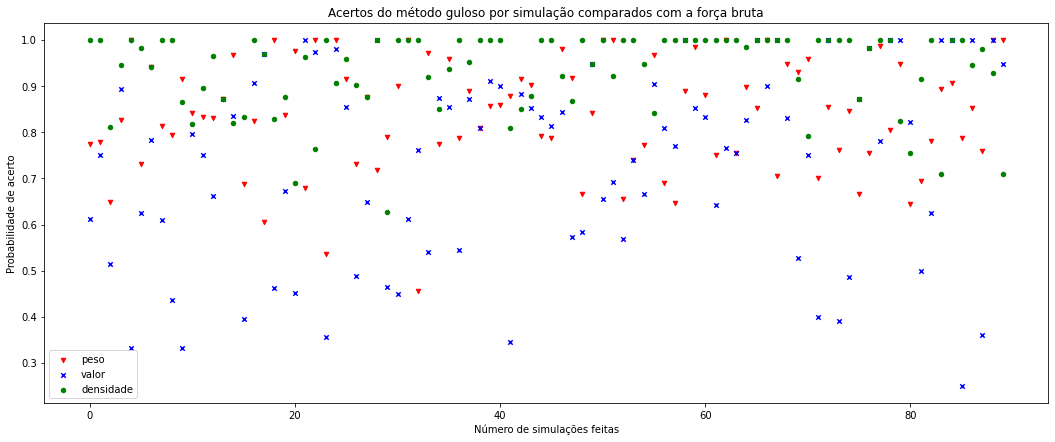

In [ ]:
#@title **Proximidade do "chute" do método guloso com o resultado real**
#@markdown A lista abaixo representa:

#@markdown [acerto do sorteamento por peso, acerto do sorteamento por valor, acerto do sorteamento por densidade]

#@markdown Em verde e com o formato de bola, estão os dados do método guloso ordenado por (valor/peso)

#@markdown Em azul e com formato de x, estão os dados do método guloso ordenado por valor.

#@markdown Em vermelho e com formato triangular, estão os dados do método guloso ordenado por peso.
res = []
sims = 90
for i in range(sims):
	items = build_items(10)
	max_weight = 20
	knapsack, opt_wt, opt_val = knapsack_brute_force(items, max_weight)
	r = []
	knapsack, wt, val = knapsack_greedy(items, max_weight, weight,True)
	r.append(float(val)/opt_val)
	knapsack, wt, val = knapsack_greedy(items, max_weight, value,False)
	r.append(float(val)/opt_val)
	knapsack, wt, val = knapsack_greedy(items, max_weight, density,False)
	r.append(float(val)/opt_val)
	res.append(r)

#print(res)
# res = [acerto do sorteamento por peso, acerto do sorteamento por valor, acerto do sorteamento por densidade]
plt.figure(figsize=(18,7))
plt.scatter(range(sims), [e[0] for e in res], c='r', marker='v', s=20)
plt.scatter(range(sims), [e[1] for e in res], c='b', marker='x', s=20)
plt.scatter(range(sims), [e[2] for e in res], c='g', marker='o', s=20)
plt.legend(["peso","valor","densidade"])
plt.title("Acertos do método guloso por simulação comparados com a força bruta")
plt.ylabel("Probabilidade de acerto")
plt.xlabel("Número de simulações feitas")
plt.show()

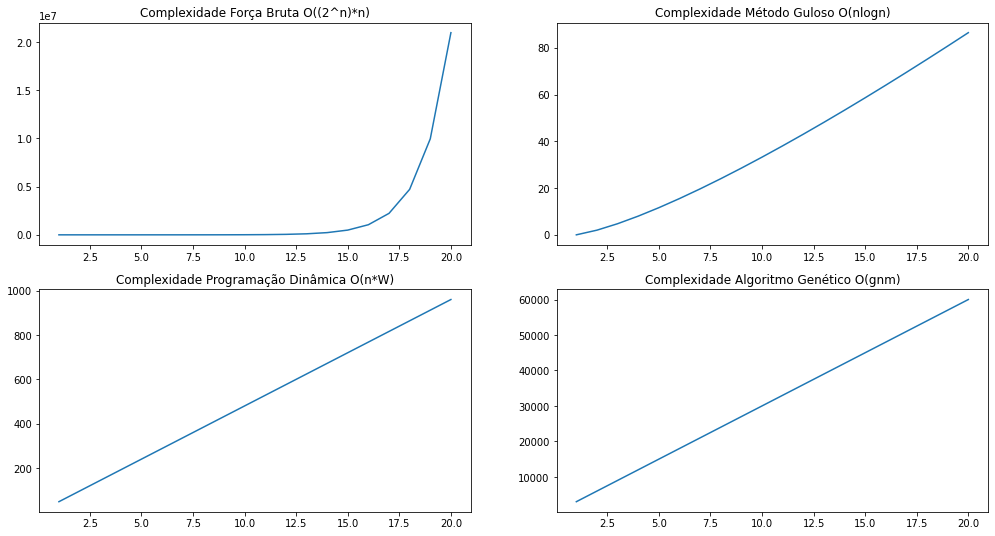

In [ ]:
#@title **Análise da complexidade dos algoritmos**
n = [i+1 for i in range(quantidade_de_itens)]

forca_bruta = [(2**j)*j for j in n]
metodo_guloso = [j*np.log2(j) for j in n]
dinamica = [j*limite_de_peso for j in n]
genetico = [iteration*populationSize*j for j in n]


fig, axs = plt.subplots(2,2,figsize=(17,9))

axs[0,0].plot(n,forca_bruta)
axs[0,0].set_title("Complexidade Força Bruta O((2^n)*n)")

axs[0,1].plot(n,metodo_guloso)
axs[0,1].set_title("Complexidade Método Guloso O(nlogn)")

axs[1,0].plot(n,dinamica)
axs[1,0].set_title("Complexidade Programação Dinâmica O(n*W)")


axs[1,1].plot(n,genetico)
axs[1,1].set_title("Complexidade Algoritmo Genético O(gnm)")

plt.show()

# **Referências**


[1]. Dantzig, Tobias. **Numbers: The Language of Science**, 1930.

[2]. Pisinger, Tobias. **Where are the hard knapsack problems?**, 2004. Disponível em: <http://www.dcs.gla.ac.uk/~pat/cpM/jchoco/knapsack/papers/hardInstances.pdf>. 

[3]. Pisinger, Tobias. **Where are the hard knapsack problems? Index Terms.**, 2004. Disponível em: <https://dl.acm.org/doi/10.1016/j.cor.2004.03.002>. Acesso em 10 de junho de 2020.

[4]. Wright, Kris. **0/1 knapsack brute force.** Disponível em: <https://www.youtube.com/watch?v=EdLw7hjAyNU&t=685s> Acesso em 3 de junho de 2020. 

[4]. GeeksforGeeks. **0-1 Knapsack Problem**. Disponível em: <https://www.geeksforgeeks.org/0-1-knapsack-problem-dp-10/>. Acesso em 2 de junho de 2020. 

[5]. Gizem, Meliha. **Knapsack Problem via Genetic Algorithm.** Disponível em: <https://github.com/megics/knapsack-GA>. Acesso em 11 de junho de 2020.

[6]. Tiwari, Satvik. **Genetic Algorithm: Part 1 -Intuition.** Disponível em: <https://medium.com/koderunners/genetic-algorithm-part-1-intuition-fde1b75bd3f9>. Acesso em 10 de junho de 2020. 

[7]. Tiwari, Satvik. **Genetic Algorithm: Part 3 — Knapsack Problem.** Disponível em: <https://medium.com/koderunners/genetic-algorithm-part-3-knapsack-problem-b59035ddd1d6>. Acesso em 10 de junho de 2020. 